## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# project_path = '/content/drive/My Drive/assignments/'
project_path = './'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [57]:
data = pd.read_csv(project_path+'students-data.csv', sep=';')

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [58]:
data.index.names = ['number']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [59]:
data.select_dtypes(exclude=['int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [60]:
#Variance of each column
data.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [61]:
#Drop the variance whose value is less than 1
data.drop(labels=data.var()[data.var().values < 1].keys(), axis=1, inplace=True)

In [62]:
#New variances
data.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [63]:
le = preprocessing.LabelEncoder()
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,3,1,0,1,1,1,1,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,1,1,0,0,0,0,1,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,1,1,1,1,0,0,1,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,1,1,0,1,1,0,1,1,1,0,2,1,1,0,16,18,19


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [64]:
data.G1[data.G1 < 10] = 0
data.G1[data.G1 >= 10] = 1
data.G2[data.G2 < 10] = 0
data.G2[data.G2 >= 10] = 1
data.G3[data.G3 < 10] = 0
data.G3[data.G3 >= 10] = 1

In [65]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [66]:
X=data.drop('G3',axis=1)
y=data['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

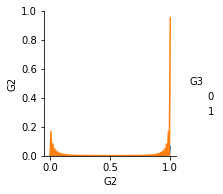

In [67]:
sns.pairplot(data=data[['G2', 'G3']], hue="G3")

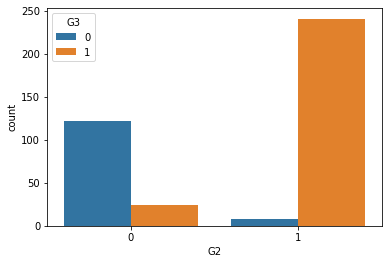

In [70]:
# count plot 
sns.countplot(x="G2", hue="G3", data=data)
plt.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

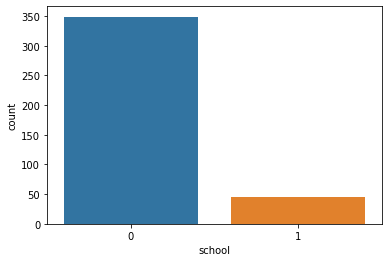

In [71]:
sns.countplot(x='school', data=data)

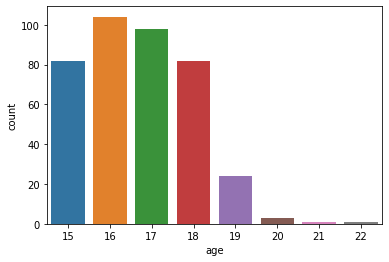

In [72]:
sns.countplot(x='age', data=data)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300,random_state=1)
print('Train size', y_train.size)
print('Test size', y_test.size)

Train size 300
Test size 95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [87]:
dt = LogisticRegression(random_state=0, max_iter=200)
dt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predicted = dt.predict(X_test)
predicted

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0])

In [90]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



In [91]:
print('Accuracy score ', metrics.accuracy_score(y_test, predicted))

Accuracy score  0.9052631578947369


In [92]:
print('F1 score', metrics.f1_score(y_test, predicted))

F1 score 0.931297709923664


Model performs at f1-score of 93.13% and accuracy score of 90.53%

# Naive bayes with Iris data

### Import Iris.csv

In [5]:
iris = pd.read_csv(project_path + 'iris.csv')

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  151 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   151 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The info shows there are few cells with null values. Let's try to find the null values. 

In [18]:
iris.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


Analyzing the data its found that 2 rows have multiple null values in different columns hence lets drop the rows as imputing multiple columns might not be a good idea.

In [19]:
# Drop the columns with null values
iris.dropna(inplace=True)

In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [22]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Drop the Id column as it is not important for prediction

In [23]:
iris.drop('Id', axis=1, inplace=True)

In [24]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [25]:
X=iris.drop('Species',axis=1)
y=iris['Species']

### Find the distribution of target variable (Class)

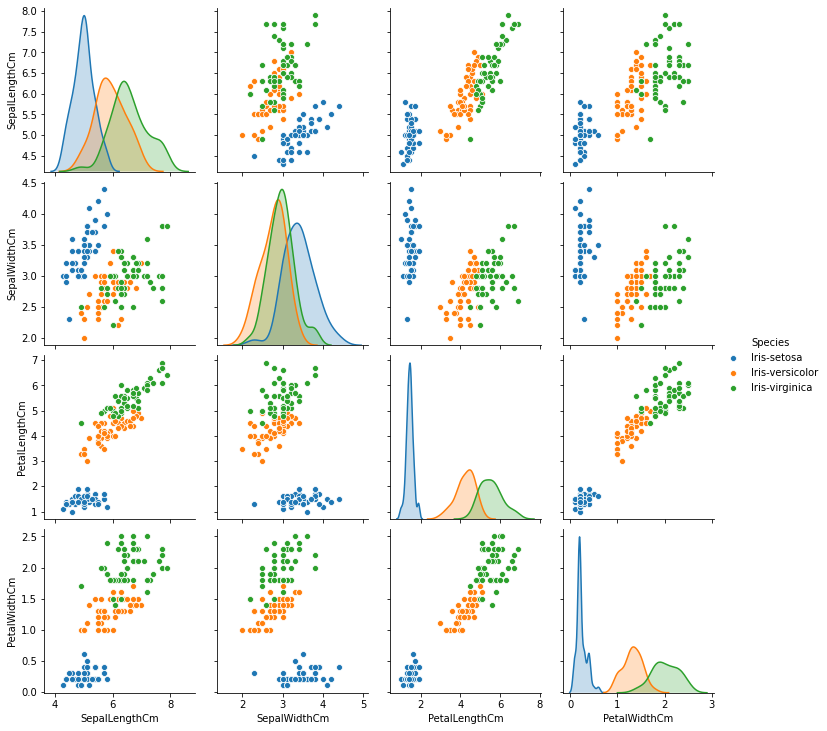

In [26]:
sns.pairplot(data=iris, hue='Species')

Petal Length and Petal Width are good features since they have very distinct distribution leading to nice seperation of species as is evident from the curve above.

### Plot the distribution of target variable using histogram

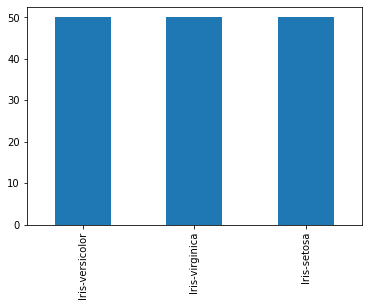

In [27]:
pd.value_counts(iris["Species"]).plot(kind="bar")

As per graph the count of each of the three species is 50.

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

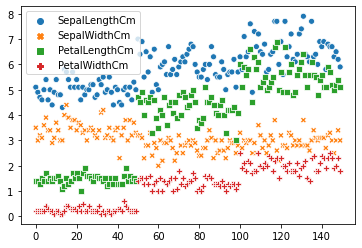

In [28]:
sns.scatterplot(data=X)

Petal Length and Petal Width are very distinctly scattered as shown from the figure above. The red and the green dots are the Petal Width and Petal Length and form a very distinctly seperable groups. The Sepal Length and Sepal Width does not have so great distinction.

### Summary Statistics and explain insights for at least 2 variables

1. Sepal Length and Sepal Width are not good features to consider. Sepal Width is worst feature in which the data is evenly distributed for all the species so would be the worst feature to select.

2. Petal Width and Petal Length are good features to consider, with Petal Width being the best feature with distinct classification of data distribution.

In [41]:
# iris[iris["Species"] == 'Iris-setosa']['SepalLengthCm'].values
stats.f_oneway(iris[iris["Species"] == 'Iris-setosa']['SepalLengthCm'], 
               iris[iris["Species"] == 'Iris-versicolor']['SepalLengthCm'],
               iris[iris["Species"] == 'Iris-virginica']['SepalLengthCm'])

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [42]:
stats.f_oneway(iris[iris["Species"] == 'Iris-setosa']['SepalWidthCm'], 
               iris[iris["Species"] == 'Iris-versicolor']['SepalWidthCm'],
               iris[iris["Species"] == 'Iris-virginica']['SepalWidthCm'])

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [43]:
stats.f_oneway(iris[iris["Species"] == 'Iris-setosa']['PetalWidthCm'], 
               iris[iris["Species"] == 'Iris-versicolor']['PetalWidthCm'],
               iris[iris["Species"] == 'Iris-virginica']['PetalWidthCm'])

F_onewayResult(statistic=959.3244057257613, pvalue=4.376956957488959e-85)

In [44]:
stats.f_oneway(iris[iris["Species"] == 'Iris-setosa']['PetalLengthCm'], 
               iris[iris["Species"] == 'Iris-versicolor']['PetalLengthCm'],
               iris[iris["Species"] == 'Iris-virginica']['PetalLengthCm'])

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

Statistically if we see the Petal Length and Petal Width are having mean very distinct followed by Sepal Length and Sepal Width. Though statistically it shows that all the features are having some ditinction and can be used for analysis but the feature importance can be proved by the pValues, the lowest is the best to defy null hypothesis that mean values are same.

### Correlation among all variables and give your insights

In [92]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000



Petal Length and Petal Width have strongest correlation followed by SepalLength to Petal Length and Sepal Length to Petal Width

Sepal Width has lowest correlation with other features.

Since the SepalWidthCm has a very low correlation lets drop the column for our model

In [45]:
iris.drop('SepalWidthCm', axis=1, inplace=True)

### Split data in Training and Validation in 80:20

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

### Do Feature Scaling

In [47]:
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [48]:
model = GaussianNB()

In [49]:
model.fit(scaledX_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [53]:
# make predictions
expected = y_test
predicted = model.predict(scaledX_test)

In [56]:
print(metrics.classification_report(expected, predicted))
print('Accuracy score', metrics.accuracy_score(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy score 0.9666666666666667


In [55]:
print(metrics.confusion_matrix(expected, predicted))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


As can be seen from the accuracy and confusion matrix that the model classifies Iris-setosa with highest accuracy and Iris-virginica with lowest accuracy.

Overall accuracy score of the model is 96.67%